# Artificial intelligence

Opdracht: <b>Neural networks</b>

Groep: 
- Xin Wang
- Jascha van der Ark

## Assignment introduction

<i>Recognizing handwritten digits is the ‘hello world’ of artificial neural networks. 
In this assignment you will train neural networks to identify the correct digital from a handwritten digit. 

You will be exploring how different input parameters (like the network topology) affects the results. 

You are free to use any tool and programming language. However, we suggest using Keras and Tensorflow (in Python).</i>

## Part 1
This part of the assignment will focus on predicting the handwritten digit, with a neural network.

### Intro

#### The relevant techniques applied:
- Image classification?
- Linear regression
- ???

#### Datasets used
- MNIST dataset of handwritten digits

#### Goal:
- The goal of this part of the assignment is to predict a handwritten digit, using a neural network.

#### Possible challenges:
- Overfitting
- Underfitting
- ???

#### Points needed to be addressed during the assesment:
- The Concept of the assignment
- The code behind the Neural network.
- The challenges behind this assignment
- A Demo

#### (Tijdelijk) Questions(Vragen voor AI)
- Wat is precies de bedoeling van deel 1 en deel 2?
- Moeten beide onderdelen in het eindassesment behandeld moeten worden?
- Het is voor ons niet heel duidelijk wat er gevraagd wordt? Kunt u ons een directie aanwijzen waarna we toe kunnen werken? (Xin) <br/>Voorbeelden: De technieken toegepast en hoe dat past binnen dit onderwerp? 

#### Dataset setup.

In [1]:
# Import all the necessary tooling
import tensorflow as tf
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np
import seaborn as sns 
# Matplotlib
import matplotlib.pyplot as plt

We will start with a binary classification of the dataset. With the goal of determining if a digit is a 1 or not.

Findings:

Fill in the findings

====
Repeat the cycle, but this time to predict if the right digit is predicted based on the handwritten digit.

In [2]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

# Create the labels
number_class = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

x_train = x_train / 255.0
x_test = x_test / 255.0

# If needed, pre-process the data.
# Convert labels to binary: 1 if the digit is '1', otherwise 0
y_train_binary = (y_train == 1).astype(int)
y_test_binary = (y_test == 1).astype(int)

# Set up the model
# Like the amounts of layers needed
# The kinds of preceptors or neurons needed
# Eventually append the prediction layer to it.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(128, activation="sigmoid"),
    # The output layer 
    tf.keras.layers.Dense(1, activation="relu")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation',
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False
)])

c:\Users\bende\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
# Evaluate
# Use the model for prediction
model.fit(x_train, y_train_binary, epochs=10, validation_split=0.1)

# Parameters: epochs 10,  optimizer= adam en loss is binary crossentropy = Result: 11 procent nauwkeurig
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_binary, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

# Test set result accuracy = 11,3 procent
# Test set result accuracy = 88 procent

# Test accuracy = 99,7 procent, Training accuracy = 99,96 procent
# With swish formula 99,7 procent, 99,72

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - auc: 0.9496 - loss: 0.6146 - val_auc: 0.9889 - val_loss: 0.0568
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - auc: 0.9860 - loss: 0.0883 - val_auc: 0.9884 - val_loss: 0.0726
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - auc: 0.9851 - loss: 0.0893 - val_auc: 0.9868 - val_loss: 0.0588
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - auc: 0.9865 - loss: 0.0728 - val_auc: 0.9938 - val_loss: 0.0407
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - auc: 0.9886 - loss: 0.0579 - val_auc: 0.9892 - val_loss: 0.0527
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - auc: 0.9896 - loss: 0.0469 - val_auc: 0.9953 - val_loss: 0.0388
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - auc: 0.9909 - loss: 0.0420 - val_auc: 0.9952 - val_loss: 0.0381
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - auc: 0.9948 - loss: 0.0320 - val_auc: 0.9956 - val_loss: 0.0284
Epoch 9/10
1688/1688 ━━━

In [4]:
# Create a visualisation
# Function to plot images with their predicted probabilities
def plot_predictions(images, labels, predictions, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images//2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}\nPred: {predictions[i]:.4f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_bar_predictions(images, labels, predictions):
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.5
    bar_positions = np.arange(len(images))
    
    bars = ax.bar(bar_positions, predictions, bar_width, align='center')

    # Add actual labels on top of the bars
    for bar, label, prob in zip(bars, labels, predictions):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{label}\n{prob:.2f}', 
                ha='center', va='bottom', fontsize=10)

    ax.set_xlabel('Image Index')
    ax.set_ylabel('Predicted Probability of Being "1"')
    ax.set_title('Predicted Probabilities of Being "1" for Selected Images')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels([f'Img {i+1}' for i in range(len(images))], rotation=45)

    plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


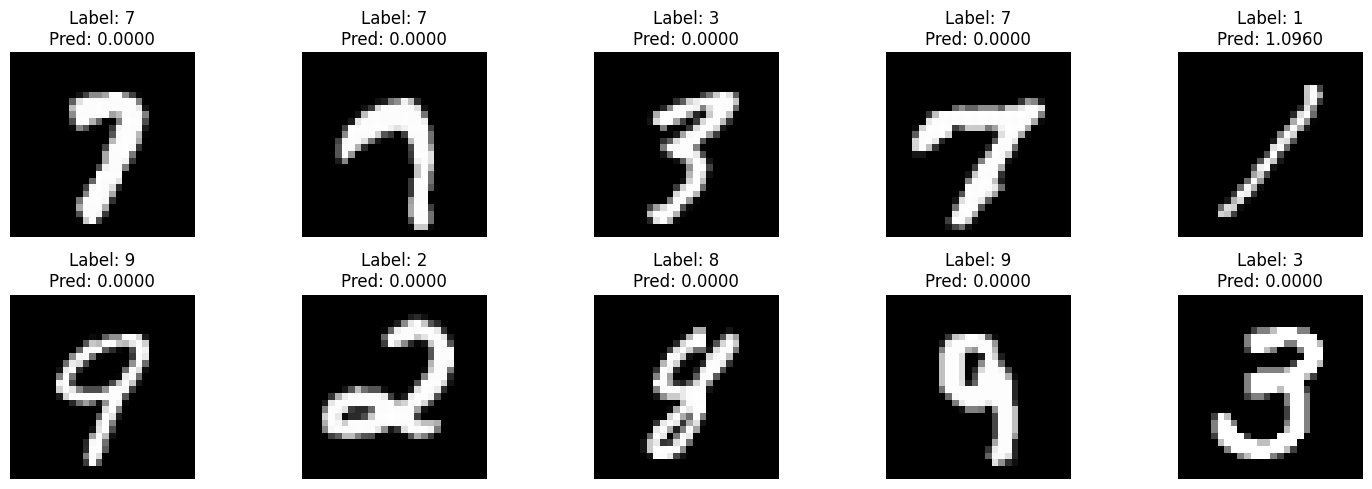

Total number of 1's in dataset  1135
Total number of 0's in dataset  8865
Total number of 1 predictions  1126
Total number of 0 predictions  8874
Total number of false 1 predictions  11
Total number of false 0 predictions  20
Chance of false 1 prediction 0.9769094138543518 %
Chance of false 0 prediction 0.225377507324769 %


In [5]:
predictions = model.predict(x_test)
predictions_formatted = predictions

def filter_only_ones(input_list):
    return [x for x in input_list if x == 1]

for i in range(len(predictions)): 
    if predictions[i] >= 0.5: 
        predictions_formatted[i] = 1
    else: predictions_formatted[i] = 0


    
countOf1 = len(filter_only_ones(y_test))
countOf0 = len(y_test) - countOf1

countOfPredicted1 = len(filter_only_ones(predictions_formatted))
countOfPredicted0 = len(predictions_formatted) - countOfPredicted1

countOfFalse1 = 0
countOfFalse0 = 0

for i in range(len(predictions)): 
    if predictions_formatted[i] != y_test_binary[i] : 
        if predictions_formatted[i] == 1 : 
            countOfFalse1 += 1
        else: 
            countOfFalse0 += 1


# Select a few test images to visualize
num_images_to_visualize = 10
indices = np.random.choice(len(x_test), num_images_to_visualize, replace=False)
selected_images = x_test[indices]
selected_labels = y_test[indices]

# Preprocess the images: no need to reshape, model accepts (num_samples, 28, 28)
selected_images_preprocessed = selected_images

# Use the model to predict the probabilities
predictions = model.predict(selected_images_preprocessed).flatten()

# Plot the images with their predicted probabilities
plot_predictions(selected_images, selected_labels, predictions, num_images=num_images_to_visualize)

print("Total number of 1's in dataset ", countOf1)
print("Total number of 0's in dataset ", countOf0)
print("Total number of 1 predictions ", countOfPredicted1)
print("Total number of 0 predictions ", countOfPredicted0)
print("Total number of false 1 predictions ", countOfFalse1)
print("Total number of false 0 predictions ", countOfFalse0)
print("Chance of false 1 prediction", (countOfFalse1 / countOfPredicted1 * 100), "%")
print("Chance of false 0 prediction", (countOfFalse0 / countOfPredicted0 * 100), "%")


## Part 2

To see the methodology of the second part of the assignment, follow this file below or go to file part2.ipynb